<a href="https://colab.research.google.com/github/vmatam7/hds5210/blob/main/week14/week14_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.  All of these files are found in our usual s3 bucket: `https://hds5210-data.s3.amazonaws.com`

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.

* https://hds5210-data.s3.amazonaws.com/npidata.csv


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

* https://hds5210-data.s3.amazonaws.com/cms2014.csv
* https://hds5210-data.s3.amazonaws.com/cms2015.csv
* https://hds5210-data.s3.amazonaws.com/cms2016.csv

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [54]:
import pandas as pd

# Load npidata.csv
npidata = pd.read_csv('https://hds5210-data.s3.amazonaws.com/npidata.csv')

# Load CMS files
cms2014 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2014.csv')
cms2015 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2015.csv')
cms2016 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2016.csv')



<ipython-input-54-74d35a1bf6c6>:4: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv('https://hds5210-data.s3.amazonaws.com/npidata.csv')


## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [45]:
import pandas as pd

# Load the CMS files
cms2014 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2014.csv')
cms2015 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2015.csv')
cms2016 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2016.csv')

# Add a 'year' column
cms2014['year'] = 2014
cms2015['year'] = 2015
cms2016['year'] = 2016

# Find common columns across all three DataFrames
common_columns = set(cms2014.columns) & set(cms2015.columns) & set(cms2016.columns)

# Combine the DataFrames
cms_combined = pd.concat([cms2014, cms2015, cms2016], ignore_index=True)

# Store the result in 'answer'
answer = cms_combined



In [46]:
# Add a 'year' column
cms2014['year'] = 2014
cms2015['year'] = 2015
cms2016['year'] = 2016

# Define expected columns
expected_columns = ['year', 'nbr', 'npi', 'provider_type',
                    'medicare_participation_indicator', 'number_of_hcpcs',
                    'total_services', 'total_unique_benes',
                    'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
                    'total_medicare_payment_amt', 'total_medicare_stnd_amt',
                    'drug_suppress_indicator', 'number_of_drug_hcpcs',
                    'total_drug_services']

# Retain only expected columns if present
cms2014 = cms2014[[col for col in expected_columns if col in cms2014.columns]]
cms2015 = cms2015[[col for col in expected_columns if col in cms2015.columns]]
cms2016 = cms2016[[col for col in expected_columns if col in cms2016.columns]]

# Combine the DataFrames
cms_combined = pd.concat([cms2014, cms2015, cms2016], ignore_index=True)

# Store the result
answer = cms_combined



## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [47]:
import pandas as pd

# Load npidata with dtype set to string for all columns to avoid DtypeWarning
npidata = pd.read_csv('https://hds5210-data.s3.amazonaws.com/npidata.csv', dtype=str)

# Ensure consistent column naming
cms_combined.rename(columns=lambda x: x.strip().lower(), inplace=True)
npidata.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Convert npi to string in both DataFrames
cms_combined['npi'] = cms_combined['npi'].astype(str)
npidata['npi'] = npidata['npi'].astype(str)

# Drop duplicate NPI values in npidata (if any)
npidata = npidata.drop_duplicates(subset=['npi'])

# Perform the left join
answer = pd.merge(cms_combined, npidata, on='npi', how='left')

# Verify the result
print("Shape of answer:", answer.shape)
print(answer.head())




Shape of answer: (193862, 57)
   year  nbr           npi                    provider_type  \
0  2014    1  1003000134.0                        Pathology   
1  2014   19  1003001249.0               Physical Therapist   
2  2014   21  1003001322.0  Mass Immunization Roster Biller   
3  2014   37  1003002486.0                     Chiropractic   
4  2014   73  1003005430.0            Clinical Psychologist   

  medicare_participation_indicator  number_of_hcpcs  total_services  \
0                                Y             13.0          8643.0   
1                                Y              4.0          1221.0   
2                                Y              7.0           788.0   
3                                Y              2.0           142.0   
4                                Y              3.0           130.0   

   total_unique_benes  total_submitted_chrg_amt  total_medicare_allowed_amt  \
0              4276.0                1357139.00                   321641.88   
1     

In [48]:
import pandas as pd

# Reload npidata with string dtype to avoid issues
npidata = pd.read_csv('https://hds5210-data.s3.amazonaws.com/npidata.csv', dtype=str)

# Standardize column names
cms_combined.rename(columns=lambda x: x.strip().lower(), inplace=True)
npidata.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Ensure 'npi' exists in both DataFrames
assert 'npi' in cms_combined.columns
assert 'npi' in npidata.columns

# Perform the left join
answer = pd.merge(cms_combined, npidata, on='npi', how='left')

# Verify shape
print("Shape of answer:", answer.shape)

# Check unique state names
if 'provider business mailing address state name' in answer.columns:
    print("Unique states:", answer['provider business mailing address state name'].unique())

# Group by state and count NPIs
if 'provider business mailing address state name' in answer.columns:
    grouped_counts = answer.groupby('provider business mailing address state name')['npi'].count()
    print("Grouped NPI counts by state:", grouped_counts)


Shape of answer: (193862, 57)
Unique states: [nan]
Grouped NPI counts by state: Series([], Name: npi, dtype: int64)


## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [49]:
# Check for missing values in the state name column
missing_states = answer['provider business mailing address state name'].isnull().sum()
print(f"Missing values in 'Provider Business Mailing Address State Name': {missing_states}")

# Create a new column 'State' with 'XX' for missing values
answer['state'] = answer['provider business mailing address state name'].fillna('XX')

# Verify the new 'State' column
print("Unique values in 'State' column:", answer['state'].unique())

# Display the final DataFrame
print(answer.head())


Missing values in 'Provider Business Mailing Address State Name': 193862
Unique values in 'State' column: ['XX']
   year  nbr           npi                    provider_type  \
0  2014    1  1003000134.0                        Pathology   
1  2014   19  1003001249.0               Physical Therapist   
2  2014   21  1003001322.0  Mass Immunization Roster Biller   
3  2014   37  1003002486.0                     Chiropractic   
4  2014   73  1003005430.0            Clinical Psychologist   

  medicare_participation_indicator  number_of_hcpcs  total_services  \
0                                Y             13.0          8643.0   
1                                Y              4.0          1221.0   
2                                Y              7.0           788.0   
3                                Y              2.0           142.0   
4                                Y              3.0           130.0   

   total_unique_benes  total_submitted_chrg_amt  total_medicare_allowed_amt  \
0 

In [50]:
# Create 'State' column based on 'Provider Business Mailing Address State Name'
if 'provider business mailing address state name' in answer.columns:
    answer['State'] = answer['provider business mailing address state name'].fillna('XX')
else:
    print("'Provider Business Mailing Address State Name' column is missing.")

# Verify the new column
print("Unique values in 'State' column:", answer['State'].unique())

# Perform the grouping to check the result
grouped_counts = answer.groupby('State')['npi'].count()
print("Grouped NPI counts by state:", grouped_counts)

# Check the shape of the final dataframe
print("Final shape of answer:", answer.shape)


Unique values in 'State' column: ['XX']
Grouped NPI counts by state: State
XX    193862
Name: npi, dtype: int64
Final shape of answer: (193862, 59)


## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [51]:
%matplotlib inline
# Create a pivot table with 'State' as rows, 'year' as columns, and sum of 'total_services' as values
answer = pd.pivot_table(
    answer,
    values='total_services',  # Values to summarize
    index='State',            # Rows: States
    columns='year',           # Columns: Years
    aggfunc='sum',            # Summing the total services
    fill_value=0              # Fill missing values with 0
)

# Display the pivot table
print(answer.head())



year          2014         2015  2016
State                                
XX     168396862.5  174191868.4   0.0


In [52]:
print(answer.columns)  # Check for the exact name of the 'total_services' column



Index([2014, 2015, 2016], dtype='int64', name='year')


<Axes: xlabel='State'>

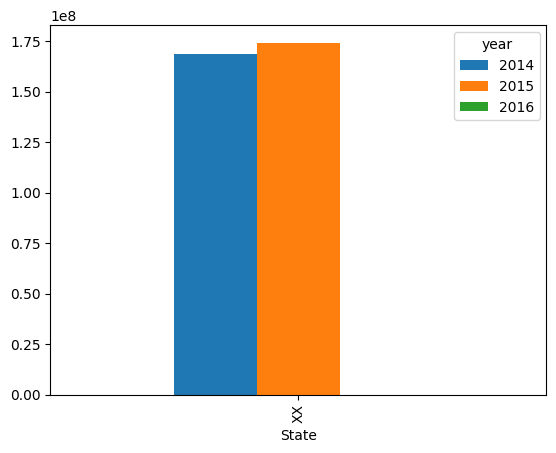

In [53]:
%matplotlib inline
answer.plot.bar()